In [4]:
import cv2, numpy as np
import sys, os
import matplotlib.pyplot as plt
import copy
from PIL import Image
import math

PI = np.pi

In [5]:
def maximizeContrast(imgGrayscale):

    height, width = imgGrayscale.shape

    imgTopHat = np.zeros((height, width, 1), np.uint8)
    imgBlackHat = np.zeros((height, width, 1), np.uint8)

    structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    # structuringElement = np.ones((3, 3), np.uint8)
    imgTopHat = cv2.morphologyEx(imgGrayscale, cv2.MORPH_TOPHAT, structuringElement)
    imgBlackHat = cv2.morphologyEx(imgGrayscale, cv2.MORPH_BLACKHAT, structuringElement)

    imgGrayscalePlusTopHat = cv2.add(imgGrayscale, imgTopHat)
    imgGrayscalePlusTopHatMinusBlackHat = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

    return imgGrayscalePlusTopHatMinusBlackHat

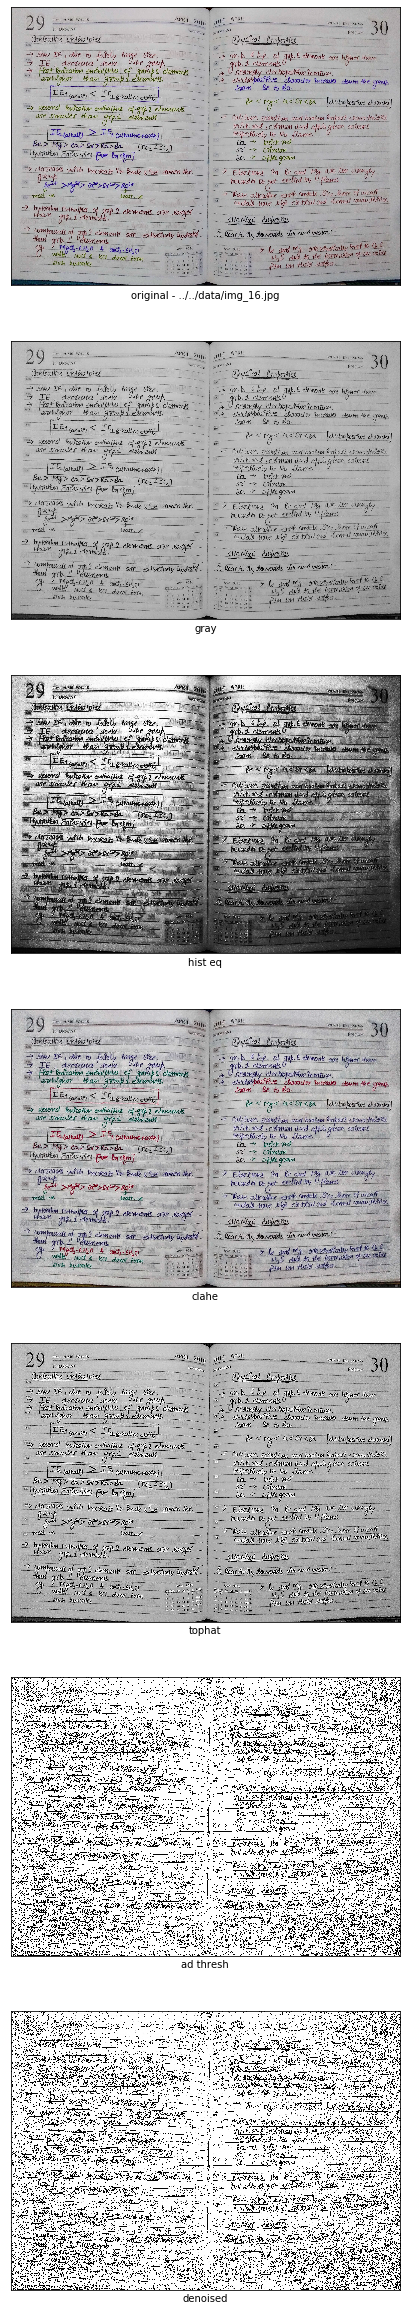

In [3]:
img_name = '../../data/img_16.jpg'

def plot_image (id, label, img):
    plt.subplot (7, 1, id)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.xlabel(label)

original_img = cv2.imread (img_name, cv2.IMREAD_UNCHANGED)
gray = cv2.imread (img_name, 0)
lab = cv2.cvtColor (original_img, cv2.COLOR_BGR2LAB)

# adaptive thresh
# gauss = cv2.bilateralFilter (gray, 3, 75, 75)
adthresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
ret, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# add tophat remove blackhat.
tophat_output = maximizeContrast (gray)

# Histogram equalization
hist_output = cv2.equalizeHist (gray)

# CLAHE is a special historgram eq
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(12,12))
clahe_output = lab
clahe_output[...,0] = clahe.apply(lab[..., 0])

# denoising
# denoised = cv2.fastNlMeansDenoising(gray, 11, 31, 9)
# denoised = cv2.fastNlMeansDenoising(thresh, 11, 31, 9)
denoised = cv2.fastNlMeansDenoising(adthresh, 11, 31, 9)

gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
hist_output = cv2.cvtColor(hist_output, cv2.COLOR_GRAY2RGB)
tophat_output = cv2.cvtColor(tophat_output, cv2.COLOR_GRAY2RGB)
clahe_output = cv2.cvtColor(clahe_output, cv2.COLOR_LAB2RGB)
adthresh = cv2.cvtColor (adthresh, cv2.COLOR_GRAY2RGB)
denoised = cv2.cvtColor (denoised, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(40, 40 * 7))
plot_image (1, 'original - ' + img_name , original_img)
plot_image (2, 'gray', gray)
plot_image (3, 'hist eq', hist_output)
plot_image (4, 'clahe', clahe_output)
plot_image (5, 'tophat', tophat_output)
plot_image (6, 'ad thresh', adthresh)
plot_image (7, 'denoised', denoised)

if not os.path.exists('images/'):
    os.mkdir('images/')
plt.savefig ('images/fig2.jpg')
plt.show()
cv2.destroyAllWindows()